In [1]:
import numpy as np
import pandas as pd

In [2]:
cardio_base_df = pd.read_csv("datasets/cardio_base.csv")
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [3]:
cardio_base_df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [4]:
cardio_base_df.duplicated().sum()

np.int64(0)

In [5]:
# Convert age from days to years
cardio_base_df['age_years'] = cardio_base_df['age'].apply(lambda x: x/365).astype('int')
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


### How much heavier is the age group with the highest average weight than the age group with the lowest average weight?

In [6]:
cardio_base_df['age'].nunique(), cardio_base_df['age_years'].nunique()

(8076, 28)

In [7]:
cardio_base_df.groupby('age_years').groups

{29: [6219, 22343, 30666], 30: [55905], 39: [14, 25, 28, 53, 106, 107, 118, 123, 189, 227, 254, 321, 398, 503, 525, 553, 598, 626, 677, 681, 702, 768, 780, 782, 801, 848, 902, 953, 960, 961, 1029, 1062, 1072, 1141, 1151, 1154, 1176, 1262, 1342, 1394, 1402, 1441, 1445, 1452, 1510, 1519, 1577, 1601, 1614, 1644, 1666, 1683, 1686, 1716, 1750, 1768, 1772, 1950, 1955, 1975, 2024, 2049, 2067, 2233, 2252, 2294, 2333, 2375, 2410, 2447, 2454, 2515, 2519, 2535, 2552, 2568, 2585, 2607, 2646, 2694, 2701, 2715, 2731, 2784, 2815, 2829, 2874, 2920, 2961, 2997, 3014, 3080, 3092, 3103, 3130, 3204, 3209, 3217, 3227, 3245, ...], 40: [12, 32, 100, 193, 202, 246, 312, 340, 368, 451, 472, 482, 563, 591, 678, 690, 700, 728, 729, 761, 834, 837, 842, 908, 983, 994, 1020, 1048, 1073, 1084, 1207, 1220, 1260, 1316, 1343, 1466, 1651, 1703, 1803, 1878, 1890, 1910, 1932, 1934, 1937, 1939, 1979, 2020, 2056, 2135, 2202, 2231, 2275, 2279, 2307, 2360, 2436, 2451, 2457, 2459, 2472, 2511, 2556, 2600, 2652, 2658, 2671, 2675

In [8]:
cardio_base_df[cardio_base_df['age_years'] == 29]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
6219,8850,10878,1,175,59.0,120,80,1,0,29
22343,31922,10798,2,175,92.0,100,60,1,0,29
30666,43842,10859,1,159,59.0,120,80,1,0,29


In [9]:
avg_weight_by_age = cardio_base_df.groupby('age_years').agg({'weight': 'mean'})
avg_weight_by_age.head()

,weight
age_years,
29,70.000000
30,59.000000
39,72.291573
40,70.914920
41,72.895849


In [10]:
avg_weight_by_age.tail()

,weight
age_years,
60,74.004312
61,75.707111
62,74.047713
63,75.873721
64,74.619113


In [11]:
avg_weight_by_age.max().values, avg_weight_by_age.min().values

(array([75.87372076]), array([59.]))

In [12]:
lightest_avg_weight, heaviest_avg_weight = avg_weight_by_age.min().values, avg_weight_by_age.max().values
lightest_avg_weight, heaviest_avg_weight

(array([59.]), array([75.87372076]))

In [13]:
# Weight difference in kg
weight_diff = heaviest_avg_weight - lightest_avg_weight
weight_diff

array([16.87372076])

In [14]:
# Relative difference as a percentage
weight_diff / lightest_avg_weight * 100

array([28.59952671])

In [15]:
# One liner for relative difference as a percentage
# Here's how the -1 comes about, when we divide the max() avg weight by the min() avg weight
# we got how many times bigger. This will give approx. 1.286. This is to say, max() is 1.286x min()
# We subtract 1 (this ratio - 1) to get the actual relative difference.
(avg_weight_by_age.max() / avg_weight_by_age.min() - 1) * 100

weight    28.599527
dtype: float64

### Do people over 50 have higher cholesterol levels than the rest?

In [16]:
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


In [17]:
over_50 = cardio_base_df[cardio_base_df['age_years'] > 50]
over_50.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
5,8,21914,1,151,67.0,120,80,2,0,60
6,9,22113,1,157,93.0,130,80,3,0,60
7,12,22584,2,178,95.0,130,90,3,0,61


In [18]:
under_50 = cardio_base_df[cardio_base_df['age_years'] <= 50]
under_50.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47
8,13,17668,1,158,71.0,110,70,1,0,48
12,18,14791,2,165,60.0,120,80,1,0,40


In [19]:
(over_50['cholesterol'].mean() / under_50['cholesterol'].mean() - 1) * 100

np.float64(14.688646432138007)

### Are men more likely to be a smoker than women?

In [20]:
# gender {1: female, 2: male}
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


In [21]:
smokers_by_gender = cardio_base_df.groupby('gender').agg({'smoke': 'sum'})
smokers_by_gender

,smoke
gender,
1,813
2,5356


In [22]:
smokers_by_gender[smokers_by_gender.index == 2].values / smokers_by_gender[smokers_by_gender.index == 1].values
# Yes, men are 6.5 times more likely to be smokers as compared to women

array([[6.58794588]])

### How tall are the tallest 1% of people

In [23]:
cardio_base_df['height'].quantile(0.99)

np.float64(184.0)

### Which two features have the highest spearman rank correlation?

In [24]:
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


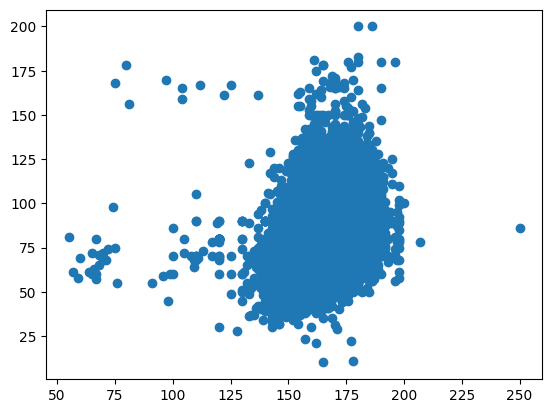

In [25]:
# Let's investigate how height and weight relate using Pearson's correlation
import matplotlib.pyplot as plt

plt.scatter(cardio_base_df['height'], cardio_base_df['weight'])

In [26]:
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


In [36]:
cardio_base_df.groupby(['age_years', 'smoke']).agg({"height": "mean"}).head()

height
age_years smoke            
29        0      169.666667
30        0      160.000000
39        0      164.577820
          1      170.735751
40        0      164.481985

In [43]:
cardio_base_df.groupby(['age_years', 'smoke']).agg({"height": "mean"}).unstack().head()

height            
smoke               0           1
age_years                        
29         169.666667         NaN
30         160.000000         NaN
39         164.577820  170.735751
40         164.481985  170.496689
41         164.765945  170.327801